# Input data

## Reading Data

In [ ]:
!pip install pickle5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 256 kB 11.6 MB/s 


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
import pickle5 as pickle
from pathlib import Path
from google.colab import drive

In [ ]:
drive_dir = Path('drive')
drive.mount(str(drive_dir.resolve()), force_remount=True)

Mounted at /content/drive


In [ ]:
with open('/content/drive/MyDrive/mumin-small/tweet.pickle', 'rb') as f:
    tweet_df = pd.DataFrame(pickle.load(f))

tweet_df.dropna(inplace=True)

with open('/content/drive/MyDrive/mumin-small/reply.pickle', 'rb') as f:
    reply_df = pd.DataFrame(pickle.load(f))

reply_df.dropna(inplace=True)

with open('/content/drive/MyDrive/mumin-small/text_emb_sml_tweet.pkl', 'rb') as f:
    tweet_temb_df = pd.DataFrame(pickle.load(f))
    
with open('/content/drive/MyDrive/mumin-small/multilingual_emb_sml_tweet.pkl', 'rb') as f:
    tweet_memb_df = pd.DataFrame(pickle.load(f))

    
with open('/content/drive/MyDrive/mumin-small/text_emb_sml_reply.pkl', 'rb') as f:
    reply_temb_df = pd.DataFrame(pickle.load(f))
    
with open('/content/drive/MyDrive/mumin-small/multilingual_emb_sml_reply.pkl', 'rb') as f:
    reply_memb_df = pd.DataFrame(pickle.load(f))

    
with open('/content/drive/MyDrive/mumin-small/tweet_discusses_claim.pickle', 'rb') as f:
    tweet_discusses_claim_df = pd.DataFrame(pickle.load(f))
        
with open('/content/drive/MyDrive/mumin-small/claim.pickle', 'rb') as f:
    claim_df = pd.DataFrame(pickle.load(f))

with open('/content/drive/MyDrive/mumin-small/reply_reply_to_tweet.pickle', 'rb') as f:
    reply_reply_to_tweet_df = pd.DataFrame(pickle.load(f))


tweet_claim_df = (tweet_df
                  .merge(tweet_discusses_claim_df, left_index=True, right_on='src')
                          .merge(claim_df, left_on='tgt', right_index=True)
                          .reset_index(drop=True))


In [ ]:
claim_df

,embedding,label,reviewers,date,language,keywords,cluster_keywords,cluster,train_mask,val_mask,test_mask,reviewer_emb
0,"[-0.04202667623758316, -0.00033039430854842067...",misinformation,[observador.pt],2020-03-15 12:30:21,pt,corona virus reaching lungs remains,coronavirus china covid 19 treatments recommended,0,True,False,False,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,"[-0.19561722874641418, -0.23915071785449982, 0...",misinformation,[observador.pt],2020-08-17 17:14:55,pt,big dubai airport,,-1,True,False,False,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,"[0.05876247584819794, 0.02175525575876236, 0.0...",misinformation,[observador.pt],2020-03-23 01:55:11,pt,news corona virus vaccine ready,coronavirus china covid 19 treatments recommended,0,True,False,False,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,"[0.05904906615614891, 0.3682330846786499, 0.00...",misinformation,[observador.pt],2018-02-19 21:05:35,pt,gardenzio stallone died morning prostate,,-1,True,False,False,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,"[0.049279212951660156, 0.021194076165556908, -...",misinformation,[observador.pt],2020-06-03 10:24:50,pt,81 blacks killed blacks 97,agency jacques attali future question finding ...,16,True,False,False,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...
2162,"[0.19675391912460327, 0.02616865746676922, -0....",misinformation,[boomlive.in],2021-05-10 13:09:31,en,searched google 163 million times,,-1,True,False,False,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, ..."
2163,"[-0.03113579750061035, 0.06013331934809685, -0...",factual,[dogrulukpayi.com],2021-06-12 00:00:00,tr,turkey akp era added history,,-1,True,False,False,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2164,"[0.031979452818632126, 0.10698806494474411, -0...",factual,[dogrulukpayi.com],2021-07-04 00:00:00,tr,diyanet issued fatwa women money,,-1,True,False,False,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2165,"[-0.010320787318050861, 0.2420617938041687, 0....",misinformation,[dogrulukpayi.com],2020-12-11 00:00:00,tr,announced temporary facial paralysis,coronavirus china covid 19 treatments recommended,0,True,False,False,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [ ]:
tweet_claim_df['mbert_emb'] = tweet_memb_df['mbert_emb']

In [ ]:
tweet_claim_df

,tweet_id,text,created_at,lang,source,num_retweets,num_replies,num_quote_tweets,text_emb,lang_emb,...,date,language,keywords,cluster_keywords,cluster,train_mask,val_mask,test_mask,reviewer_emb,mbert_emb
0,1238947475471454220,Antes de llegar a los pulmones dura 4 días en ...,2020-03-14 21:57:51,es,Twitter for Android,8,3,0,"[-0.04670783, 0.25794998, 0.11981608, 0.497506...","[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...",...,2020-03-15 12:30:21,pt,corona virus reaching lungs remains,coronavirus china covid 19 treatments recommended,0,True,False,False,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.23923446, -0.16216074, 0.22283724, -0.11268..."
1,1295062953000042496,Aeroporto de Dubai em chamas. 🤕😧 https://t.co/...,2020-08-16 18:20:43,pt,Twitter for Android,6,0,5,"[-0.048320483, 0.22119139, 0.10080599, 0.50664...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",...,2020-08-17 17:14:55,pt,big dubai airport,,-1,True,False,False,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.2072007, -0.09352049, 0.25972712, -0.147420..."
2,1294614020008312832,Fogo 🔥 no aeroporto de Dubai 😱😱 https://t.co/2...,2020-08-15 12:36:49,pt,Twitter for Android,24,11,7,"[-0.049369, 0.20724599, 0.09472715, 0.51769394...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",...,2020-08-17 17:14:55,pt,big dubai airport,,-1,True,False,False,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.1993605, -0.0929458, 0.21718983, 0.00528050..."
3,1295124644085805057,Incendio en el aeropuerto de Dubai https://t.c...,2020-08-16 22:25:52,es,Twitter for Android,35,5,3,"[-0.043678723, 0.23453875, 0.1163164, 0.508362...","[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...",...,2020-08-17 17:14:55,pt,big dubai airport,,-1,True,False,False,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.21867537, -0.13228396, 0.21533051, -0.05232..."
4,1240979964888899584,మంచి వార్త! కరోనా వైరస్ వ్యాక్సిన్ సిద్ధంగా ఉ...,2020-03-20 12:34:14,te,Twitter for Android,27,14,0,"[-0.050721385, 0.2427442, 0.12608093, 0.490136...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",...,2020-03-23 01:55:11,pt,news corona virus vaccine ready,coronavirus china covid 19 treatments recommended,0,True,False,False,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.091703944, -0.007984741, 0.15694909, 0.0047..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4885,1337292732600111104,"BioNTech/Pfizer, aşı grubundaki 4 kişide geçic...",2020-12-11 07:06:47,tr,Twitter for iPhone,8,5,4,"[-0.069716774, 0.2251982, 0.122060336, 0.50211...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",...,2020-12-11 00:00:00,tr,announced temporary facial paralysis,coronavirus china covid 19 treatments recommended,0,True,False,False,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.31924692, -0.0806019, 0.13881814, -0.093546..."
4886,1337439785359712256,BioNTech/Pfizer Şirketinin geliştirdiği Covid-...,2020-12-11 16:51:07,tr,Twitter for Android,8,3,1,"[-0.060394626, 0.22728683, 0.11818539, 0.49807...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",...,2020-12-11 00:00:00,tr,announced temporary facial paralysis,coronavirus china covid 19 treatments recommended,0,True,False,False,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.20877132, -0.09905889, 0.13160245, -0.05601..."
4887,1337386009827405824,"Pfizer aşısında ""aşı grubundaki"" dört kişide g...",2020-12-11 13:17:26,tr,Twitter Web App,16,4,3,"[-0.062845625, 0.2218779, 0.12043206, 0.509283...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",...,2020-12-11 00:00:00,tr,announced temporary facial paralysis,coronavirus china covid 19 treatments recommended,0,True,False,False,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.11034852, -0.05276793, 0.10637367, 0.026319..."
4888,1337327032418627585,"BioNTech/ Pfizer, aşı grubundaki 4 kişide geçi...",2020-12-11 09:23:05,tr,Twitter for iPhone,110,78,307,"[-0.06923529, 0.21745637, 0.12069968, 0.502067...","[0, 0, 0, 0, 0, 0, 0, 

In [ ]:
tweet_emb = pd.concat([tweet_df['tweet_id'], tweet_temb_df['tweet_text_auto_64'], tweet_memb_df['tweet_mbert_auto_4']], axis=1)
reply_emb = pd.concat([reply_df['tweet_id'], reply_temb_df['reply_text_auto_32'], reply_memb_df['reply_mbert_auto_16']], axis=1)

KeyError: 'tweet_mbert_auto_4'

In [ ]:
reply_to_tweet = (reply_emb.merge(reply_reply_to_tweet_df, left_index=True, right_on='src')
                          .merge(tweet_emb, left_on='tgt', right_index=True)
                          .reset_index(drop=True))
reply_to_tweet.dropna(inplace=True)

NameError: ignored

In [ ]:
reply_to_tweet = reply_to_tweet

,tweet_id_x,auto_32,mbert_auto_16,src,tgt,tweet_id_y,tweet_text_auto_64,mbert_mbert_auto_64
0,1239109625200377858,"[0.35793316, -0.94800824, -0.9815156, 0.995699...","[-0.40491635, 0.22835834, 0.5203234, -0.339098...",1,0,1.238947e+18,"[0.54450655, -0.9301882, 0.52166307, -0.979862...","[-0.99997, 0.375231, 0.4780858, 0.64077246]"
1,1294868708779864064,"[0.52617556, -0.93120646, -0.94715536, 0.99593...","[-0.2825027, -0.061179332, 0.38576838, -0.4121...",8,2,1.294614e+18,"[0.5359646, -0.93333596, 0.49587378, -0.977363...","[-0.99986416, 0.03550395, 0.712921, 0.6859038]"
2,1294632885773885442,"[0.62792367, -0.94704854, -0.7795052, 0.996676...","[0.24129269, 0.23910491, 0.27544406, -0.358978...",9,2,1.294614e+18,"[0.5359646, -0.93333596, 0.49587378, -0.977363...","[-0.99986416, 0.03550395, 0.712921, 0.6859038]"
3,1294635137200803840,"[0.5577464, -0.9528885, -0.8690819, 0.9964633,...","[0.12628455, -0.03711827, 0.08937486, -0.28864...",10,2,1.294614e+18,"[0.5359646, -0.93333596, 0.49587378, -0.977363...","[-0.99986416, 0.03550395, 0.712921, 0.6859038]"
4,1294868846793367553,"[0.4372899, -0.94834924, -0.9664246, 0.9960881...","[-0.36377463, 0.10834398, 0.21941407, -0.38013...",11,2,1.294614e+18,"[0.5359646, -0.93333596, 0.49587378, -0.977363...","[-0.99986416, 0.03550395, 0.712921, 0.6859038]"
...,...,...,...,...,...,...,...,...
90145,1416572650214809602,"[0.54534733, -0.95222944, -0.9711867, 0.996855...","[-0.46251753, -0.4088607, -0.25035277, -0.8248...",194640,3558,1.416572e+18,"[0.55074686, -0.9322563, 0.5248499, -0.9793653...","[-0.9999678, 0.36067557, 0.43837813, 0.7318086]"
90146,1314111464035151872,"[0.54534733, -0.95222944, -0.9711867, 0.996855...","[-0.46251753, -0.4088607, -0.25035277, -0.8248...",194776,3680,1.314084e+18,"[0.5376378, -0.9335505, 0.49443644, -0.9769263...","[-0.9999659, 0.29337537, 0.45707572, 0.7095168]"
90147,1401785044193234944,"[0.54534733, -0.95222944, -0.9711867, 0.996855...","[-0.46251753, -0.4088607, -0.25035277, -0.8248...",194850,3726,1.401782e+18,"[0.5487223, -0.9313251, 0.52014697, -0.9790605...","[-0.99997216, 0.18994433, 0.26029524, 0.72415286]"
90148,1403019753074003971,"[0.54534733, -0.95222944, -0.9711867, 0.996855...","[-0.46251753, -0.4088607, -0.25035277, -0.8248...",194949,3795,1.403015e+18,"[0.54257804, -0.9318573, 0.51821256, -0.979240...","[-0.99982715, -0.18424667, 0.6115149, 0.70226914]"


In [ ]:
# Split up the data
train = tweet_claim_df.query('train_mask == True')
val = tweet_claim_df.query('val_mask == True')
test = tweet_claim_df.query('test_mask == True')

# Extract the tweet embeddings
X1 = np.array(tweet_claim_df.text_emb.tolist())
X2 = np.array(tweet_claim_df.mbert_emb.tolist())

X_train1 = np.array(train.text_emb.tolist())
X_val1 = np.array(val.text_emb.tolist())
X_test1 = np.array(test.text_emb.tolist())

X_train2 = np.array(train.mbert_emb.tolist())
X_val2 = np.array(val.mbert_emb.tolist())
X_test2 = np.array(test.mbert_emb.tolist())

# Extract the labels
y = np.array(tweet_claim_df.label.tolist())

y_train = np.array(train.label.tolist())
y_val = np.array(val.label.tolist())
y_test = np.array(test.label.tolist())

y = np.array([0 if i == 'misinformation' else 1 for i in y])
y_train = np.array([0 if i == 'misinformation' else 1 for i in y_train])
y_val = np.array([0 if i == 'misinformation' else 1 for i in y_val])
y_test = np.array([0 if i == 'misinformation' else 1 for i in y_test])
# Sanity check the dimensions
X_train1.shape, y_train.shape, X_val1.shape, y_val.shape, X_test1.shape, y_test.shape

((3665, 768), (3665,), (662, 768), (662,), (563, 768), (563,))

## UMAP visualization

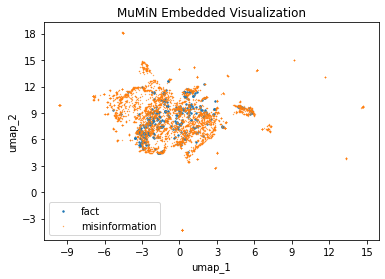

In [ ]:
import umap
reducer = umap.UMAP()
embedding = reducer.fit_transform(X1)
embedding11 = []
for i in range(len(y)):
    if y[i] == 1:
        embedding11.append(embedding[i][0]) 
embedding12 = []
for i in range(len(y)):
    if y[i] == 1:
        embedding12.append(embedding[i][1]) 
embedding21 = []
for i in range(len(y)):
    if y[i] == 0:
        embedding21.append(embedding[i][0]) 
embedding22 = []
for i in range(len(y)):
    if y[i] == 0:
        embedding22.append(embedding[i][1]) 
plt.scatter(embedding11, embedding12, s = 2)
plt.scatter(embedding21, embedding22, s = 0.1)
plt.xlabel('umap_1')
plt.ylabel('umap_2')
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))
plt.title('MuMiN Embedded Visualization') 
plt.legend(['fact', 'misinformation'])
plt.show()

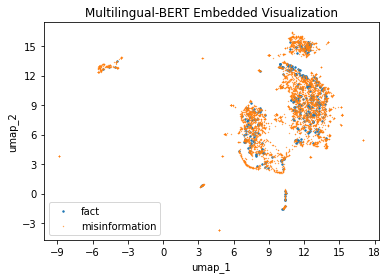

In [ ]:
from matplotlib.ticker import MaxNLocator
reducer = umap.UMAP()
embedding = reducer.fit_transform(X2)
embedding11 = []
for i in range(len(y)):
    if y[i] == 1:
        embedding11.append(embedding[i][0]) 
embedding12 = []
for i in range(len(y)):
    if y[i] == 1:
        embedding12.append(embedding[i][1]) 
embedding21 = []
for i in range(len(y)):
    if y[i] == 0:
        embedding21.append(embedding[i][0]) 
embedding22 = []
for i in range(len(y)):
    if y[i] == 0:
        embedding22.append(embedding[i][1]) 
plt.scatter(embedding11, embedding12, s = 2)
plt.scatter(embedding21, embedding22, s = 0.1)
plt.xlabel('umap_1')
plt.ylabel('umap_2')
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))
plt.title('Multilingual-BERT Embedded Visualization') 
plt.legend(['fact', 'misinformation'])
plt.show()

# Dimensional Reduction

## PCA 

In [ ]:
from sklearn.decomposition import PCA

pca1 = PCA(n_components=100)
pca2 = PCA(n_components=100)
pca1.fit(X1)
pca2.fit(X2)

PCA(n_components=100)

Text(0.5, 0, 'Dimensions')

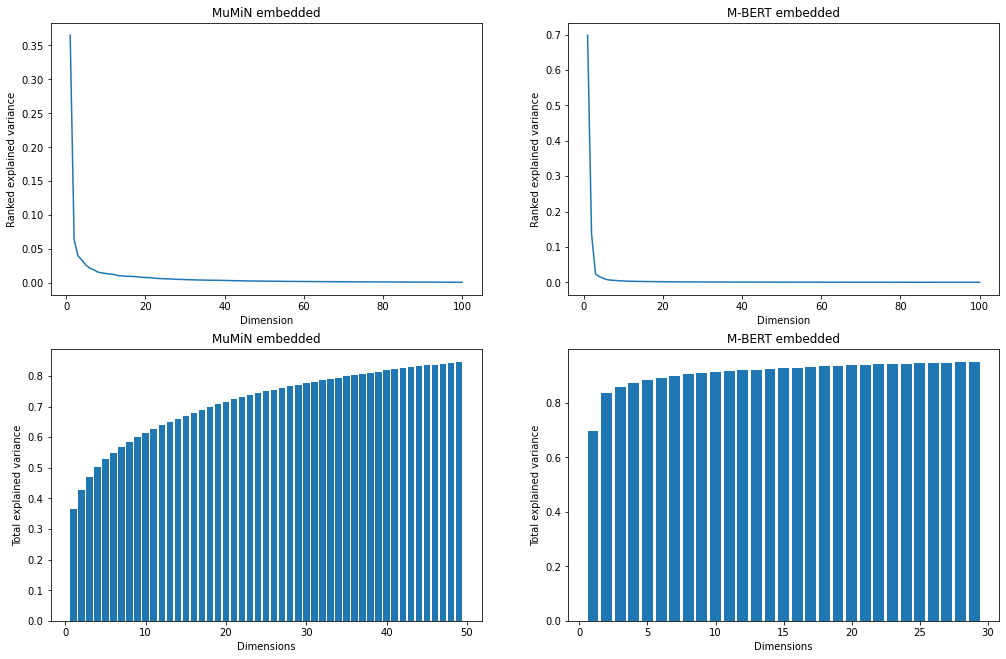

In [ ]:
plt.figure(figsize=(17,11))
plt.subplot(2,2,1)
plt.plot([i for i in range(1,101)], pca1.explained_variance_ratio_)
plt.title('MuMiN embedded')
plt.ylabel('Ranked explained variance')
plt.xlabel('Dimension')
plt.subplot(2,2,2)
plt.plot([i for i in range(1,101)], pca2.explained_variance_ratio_)
plt.title('M-BERT embedded')
plt.ylabel('Ranked explained variance')
plt.xlabel('Dimension')
plt.subplot(2,2,3)
l1 = [sum(pca1.explained_variance_ratio_[:i]) for i in range(1,50)]
l2 = [sum(pca2.explained_variance_ratio_[:i]) for i in range(1,30)]
plt.bar([i for i in range(1,50)], l1)
plt.title('MuMiN embedded')
plt.ylabel('Total explained variance')
plt.xlabel('Dimensions')
plt.subplot(2,2,4)
plt.bar([i for i in range(1,30)], l2)
plt.title('M-BERT embedded')
plt.ylabel('Total explained variance')
plt.xlabel('Dimensions')

Text(0.5, 1.0, 'mbert embedded')

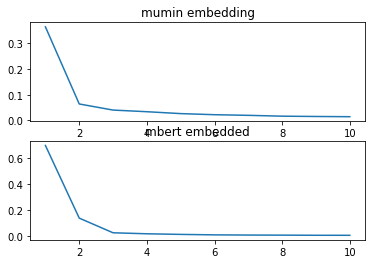

In [ ]:
plt.subplot(2,1,1)
plt.plot([i for i in range(1,11)], pca1.explained_variance_ratio_[:10])
plt.title('mumin embedding')
plt.subplot(2,1,2)
plt.plot([i for i in range(1,11)], pca2.explained_variance_ratio_[:10])
plt.title('mbert embedded')

Text(0.5, 0, 'Dimensions')

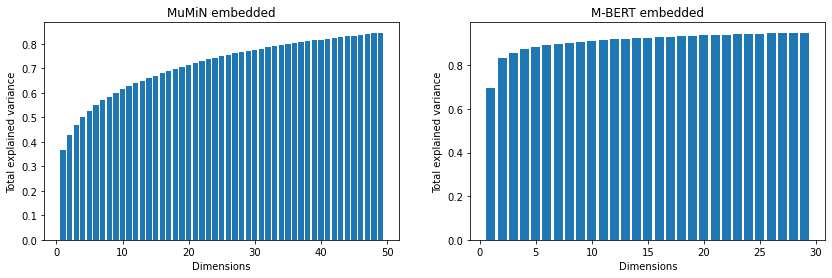

In [ ]:
plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
l1 = [sum(pca1.explained_variance_ratio_[:i]) for i in range(1,50)]
l2 = [sum(pca2.explained_variance_ratio_[:i]) for i in range(1,30)]
plt.bar([i for i in range(1,50)], l1)
plt.title('MuMiN embedded')
plt.ylabel('Total explained variance')
plt.xlabel('Dimensions')
plt.subplot(1,2,2)
plt.bar([i for i in range(1,30)], l2)
plt.title('M-BERT embedded')
plt.ylabel('Total explained variance')
plt.xlabel('Dimensions')

In [ ]:
sum(pca1.explained_variance_ratio_[:64])

0.8798899475950748

In [ ]:
print(pca1.explained_variance_ratio_[:10])
print(pca2.explained_variance_ratio_[:10])

[0.36502543 0.06368145 0.0398372  0.03341467 0.0260222  0.02177052
 0.01926549 0.01600554 0.01480273 0.01392933]
[0.69807684 0.13685317 0.0235908  0.01589399 0.01113504 0.00753258
 0.0060602  0.00540012 0.00437654 0.00409866]


In [ ]:
sum(pca1.explained_variance_ratio_[:64])

0.8798896104563028

In [ ]:
sum(pca2.explained_variance_ratio_[:4])

0.8744148071855307

In [ ]:
pca1 = PCA(n_components=64)
pca2 = PCA(n_components=4)
pca1.fit(X1)
pca2.fit(X2)
X_train1p = pca1.transform(X_train1)
X_test1p = pca1.transform(X_test1)
X_val1p = pca1.transform(X_val1)
X_train2p = pca2.transform(X_train2)
X_test2p = pca2.transform(X_test2)
X_val2p = pca2.transform(X_val2)

## PCA2

In [ ]:
from sklearn.decomposition import PCA
X1 = np.array(reply_df.text_emb.tolist())
X2 = np.array(reply_memb_df.mbert_emb.tolist())

pca1 = PCA(n_components=100)
pca2 = PCA(n_components=100)
pca1.fit(X1)
pca2.fit(X2)

PCA(n_components=100)

Text(0.5, 1.0, 'mbert embedded')

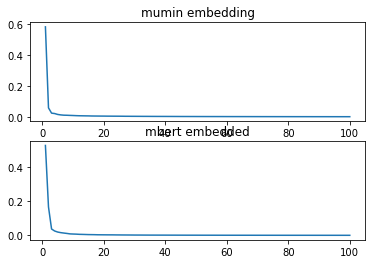

In [ ]:
plt.subplot(2,1,1)
plt.plot([i for i in range(1,101)], pca1.explained_variance_ratio_)
plt.title('mumin embedding')
plt.subplot(2,1,2)
plt.plot([i for i in range(1,101)], pca2.explained_variance_ratio_)
plt.title('mbert embedded')

Text(0.5, 1.0, 'mbert embedded')

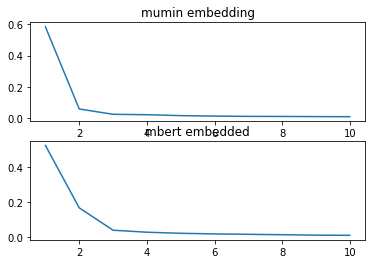

In [ ]:
plt.subplot(2,1,1)
plt.plot([i for i in range(1,11)], pca1.explained_variance_ratio_[:10])
plt.title('mumin embedding')
plt.subplot(2,1,2)
plt.plot([i for i in range(1,11)], pca2.explained_variance_ratio_[:10])
plt.title('mbert embedded')

Text(0.5, 1.0, 'mbert embedded')

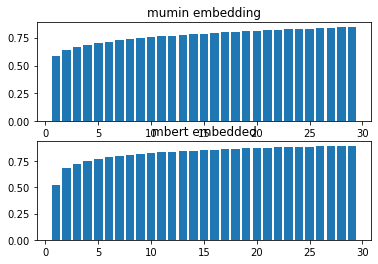

In [ ]:
plt.subplot(2,1,1)
l1 = [sum(pca1.explained_variance_ratio_[:i]) for i in range(1,30)]
l2 = [sum(pca2.explained_variance_ratio_[:i]) for i in range(1,30)]
plt.bar([i for i in range(1,30)], l1)
plt.title('mumin embedding')
plt.subplot(2,1,2)
plt.bar([i for i in range(1,30)], l2)
plt.title('mbert embedded')

In [ ]:
print(pca1.explained_variance_ratio_[:10])
print(pca2.explained_variance_ratio_[:10])

[0.58454753 0.05805241 0.02385801 0.02119727 0.01528432 0.0123394
 0.0105165  0.01001991 0.00914291 0.00842687]
[0.52388029 0.16558872 0.03716195 0.02553124 0.01939296 0.01590635
 0.01350807 0.01129634 0.0086773  0.00784773]


In [ ]:
sum(pca1.explained_variance_ratio_[:32])

0.8541877984338483

In [ ]:
sum(pca2.explained_variance_ratio_[:16])

0.861930695739951

In [ ]:
pca1 = PCA(n_components=64)
pca2 = PCA(n_components=4)
pca1.fit(X1)
pca2.fit(X2)
X_train1p = pca1.transform(X_train1)
X_test1p = pca1.transform(X_test1)
X_val1p = pca1.transform(X_val1)
X_train2p = pca2.transform(X_train2)
X_test2p = pca2.transform(X_test2)
X_val2p = pca2.transform(X_val2)

## Autoencoder

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model

In [ ]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [ ]:
tf.debugging.set_log_device_placement(False)

In [ ]:
class Autoencoder1(Model):
    def __init__(self, latent_dim):
        super(Autoencoder1, self).__init__()
        self.latent_dim = latent_dim
        self.encoder = tf.keras.Sequential([
            layers.Input(shape=(768,)),
            layers.Dense(256, activation='tanh'),
            layers.Dense(64, activation='tanh'),
            layers.Dense(latent_dim, activation='tanh'),
        ])
        self.decoder = tf.keras.Sequential([
            layers.Dense(64, activation='tanh'),
            layers.Dense(256, activation='tanh'),
            layers.Dense(768, activation='tanh')
        ])

    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

class Autoencoder2(Model):
    def __init__(self, latent_dim):
        super(Autoencoder2, self).__init__()
        self.latent_dim = latent_dim
        self.encoder = tf.keras.Sequential([
            layers.Input(shape=(768,)),
            layers.Dense(256, activation='tanh'),
            layers.Dense(64, activation='tanh'),
            layers.Dense(latent_dim, activation='tanh')
        ])
        self.decoder = tf.keras.Sequential([
            layers.Dense(64, activation='tanh'),
            layers.Dense(256, activation='tanh'),
            layers.Dense(768, activation='tanh')
        ])

    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded


In [ ]:
class Autoencoder3(Model):
    def __init__(self, latent_dim):
        super(Autoencoder3, self).__init__()
        self.latent_dim = latent_dim
        self.encoder = tf.keras.Sequential([
            layers.Input(shape=(768,)),
            layers.Dense(256, activation='tanh'),
            layers.Dense(latent_dim, activation='tanh'),
        ])
        self.decoder = tf.keras.Sequential([
            layers.Dense(256, activation='tanh'),
            layers.Dense(768, activation='tanh')
        ])

    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

class Autoencoder4(Model):
    def __init__(self, latent_dim):
        super(Autoencoder4, self).__init__()
        self.latent_dim = latent_dim
        self.encoder = tf.keras.Sequential([
            layers.Input(shape=(768,)),
            layers.Dense(256, activation='tanh'),
            layers.Dense(64, activation='tanh'),
            layers.Dense(16, activation='tanh'),
            layers.Dense(latent_dim, activation='tanh')
        ])
        self.decoder = tf.keras.Sequential([
            layers.Dense(16, activation='tanh'),
            layers.Dense(64, activation='tanh'),
            layers.Dense(256, activation='tanh'),
            layers.Dense(768, activation='tanh')
        ])

    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded


In [ ]:
autoencoder1 = Autoencoder1(32)
autoencoder2 = Autoencoder2(16)

autoencoder1.compile(optimizer='adam', loss=losses.MeanSquaredError())
autoencoder2.compile(optimizer='adam', loss=losses.MeanSquaredError())

autoencoder1.fit(X1, X1,
                epochs=10,
                shuffle=True,
                validation_data=(X1, X1))

autoencoder2.fit(X2, X2,
                epochs=10,
                shuffle=True,
                validation_data=(X2, X2))

Epoch 1/10
6112/6112 [==============================] - 65s 10ms/step - loss: 2.3363e-04 - val_loss: 7.6423e-05
Epoch 2/10
6112/6112 [==============================] - 54s 9ms/step - loss: 1.0383e-04 - val_loss: 8.7372e-05
Epoch 3/10
6112/6112 [==============================] - 51s 8ms/step - loss: 8.9360e-05 - val_loss: 8.7408e-05
Epoch 4/10
6112/6112 [==============================] - 51s 8ms/step - loss: 8.8955e-05 - val_loss: 9.9884e-05
Epoch 5/10
6112/6112 [==============================] - 49s 8ms/step - loss: 9.4636e-05 - val_loss: 8.9718e-05
Epoch 6/10
6112/6112 [==============================] - 53s 9ms/step - loss: 8.2465e-05 - val_loss: 7.8263e-05
Epoch 7/10
6112/6112 [==============================] - 48s 8ms/step - loss: 8.4055e-05 - val_loss: 8.1051e-05
Epoch 8/10
6112/6112 [==============================] - 47s 8ms/step - loss: 7.7118e-05 - val_loss: 8.6128e-05
Epoch 9/10
6112/6112 [==============================] - 49s 8ms/step - loss: 7.2958e-05 - val_loss: 7.2260e-05


InternalError: Failed copying input tensor from /job:localhost/replica:0/task:0/device:CPU:0 to /job:localhost/replica:0/task:0/device:GPU:0 in order to run _EagerConst: Dst tensor is not initialized.

In [ ]:
autoencoder3 = Autoencoder3(64)
autoencoder4 = Autoencoder4(4)

autoencoder3.compile(optimizer='adam', loss=losses.MeanSquaredError())
autoencoder4.compile(optimizer='adam', loss=losses.MeanSquaredError())

autoencoder3.fit(X1, X1,
                epochs=10,
                shuffle=True,
                validation_data=(X1, X1))

autoencoder4.fit(X2, X2,
                epochs=10,
                shuffle=True,
                validation_data=(X2, X2))

Epoch 1/10
153/153 [==============================] - 2s 10ms/step - loss: 0.0046 - val_loss: 1.3185e-04
Epoch 2/10
153/153 [==============================] - 1s 7ms/step - loss: 1.2307e-04 - val_loss: 1.1631e-04
Epoch 3/10
153/153 [==============================] - 1s 8ms/step - loss: 1.1529e-04 - val_loss: 1.0774e-04
Epoch 4/10
153/153 [==============================] - 1s 8ms/step - loss: 1.0565e-04 - val_loss: 9.4296e-05
Epoch 5/10
153/153 [==============================] - 1s 8ms/step - loss: 9.1769e-05 - val_loss: 9.4502e-05
Epoch 6/10
153/153 [==============================] - 1s 9ms/step - loss: 8.8448e-05 - val_loss: 8.3096e-05
Epoch 7/10
153/153 [==============================] - 1s 9ms/step - loss: 8.4905e-05 - val_loss: 8.3948e-05
Epoch 8/10
153/153 [==============================] - 1s 9ms/step - loss: 8.5004e-05 - val_loss: 8.4157e-05
Epoch 9/10
153/153 [==============================] - 1s 8ms/step - loss: 8.3587e-05 - val_loss: 8.1855e-05
Epoch 10/10
153/153 [==========

In [ ]:
X2 = np.array(reply_memb_df.mbert_emb.tolist())

In [ ]:
autoencoder2.fit(X2, X2,
                epochs=10,
                shuffle=True,
                validation_data=(X2, X2))

Epoch 1/10
6112/6112 [==============================] - 58s 9ms/step - loss: 0.0024 - val_loss: 0.0019
Epoch 2/10
6112/6112 [==============================] - 55s 9ms/step - loss: 0.0019 - val_loss: 0.0020
Epoch 3/10
6112/6112 [==============================] - 57s 9ms/step - loss: 0.0018 - val_loss: 0.0017
Epoch 4/10
6112/6112 [==============================] - 54s 9ms/step - loss: 0.0017 - val_loss: 0.0017
Epoch 5/10
6112/6112 [==============================] - 53s 9ms/step - loss: 0.0016 - val_loss: 0.0016
Epoch 6/10
6112/6112 [==============================] - 51s 8ms/step - loss: 0.0016 - val_loss: 0.0016
Epoch 7/10
6112/6112 [==============================] - 56s 9ms/step - loss: 0.0016 - val_loss: 0.0016
Epoch 8/10
6112/6112 [==============================] - 52s 8ms/step - loss: 0.0016 - val_loss: 0.0016
Epoch 9/10
6112/6112 [==============================] - 50s 8ms/step - loss: 0.0016 - val_loss: 0.0016
Epoch 10/10
6112/6112 [==============================] - 54s 9ms/step - l

In [ ]:
encoder1 = autoencoder1.encoder
encoder2 = autoencoder2.encoder

In [ ]:
encoder3 = autoencoder3.encoder
encoder4 = autoencoder4.encoder

In [ ]:
X1a = encoder3.predict(X1)
X2a = encoder4.predict(X2)

153/153 [==============================] - 0s 2ms/step


In [ ]:
with open('E:/DSPJ/mumin-small/multilingual_emb_sml_reply.pkl', 'rb') as f:
    reply_memb_df = pd.DataFrame(pickle.load(f))
#with open('E:/DSPJ/mumin-small/reply.pickle', 'rb') as f:
#    reply_df = pd.DataFrame(pickle.load(f))

In [ ]:
reduced = pd.DataFrame(columns = ['tweet_id', 'text_emb', 'tweet_text_auto_64'])
for i in range(len(X1a)):
    reduced.loc[len(reduced)] = [tweet_claim_df['tweet_id'][i], tweet_claim_df['text_emb'][i], X1a[i]]
reduced.to_pickle('E:/DSPJ/mumin-small/text_emb_sml_tweet.pkl') 

In [ ]:
reduced = pd.DataFrame(columns = ['tweet_id', 'mbert_emb', 'mbert_mbert_auto_4'])
for i in range(len(X2a)):
    reduced.loc[len(reduced)] = [tweet_claim_df['tweet_id'][i], tweet_claim_df['mbert_emb'][i], X2a[i]]
reduced.to_pickle('E:/DSPJ/mumin-small/multilingual_emb_sml_tweet.pkl') 

In [ ]:
X_train1a = encoder1.predict(X_train1)
X_test1a = encoder1.predict(X_test1)
X_val1a = encoder1.predict(X_val1)
X_train2a = encoder2.predict(X_train2)
X_test2a = encoder2.predict(X_test2)
X_val2a = encoder2.predict(X_val2)

21/21 [==============================] - 0s 2ms/step


# Logistic Regression Test

In [ ]:
from IPython.core.interactiveshell import ProvisionalWarning
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import f1_score
from time import time
time1 = time()
lr1 = LogisticRegressionCV(cv=5, max_iter=10000).fit(X_train1, y_train.reshape(-1,1))
time2 = time()
lr2 = LogisticRegressionCV(cv=5, max_iter=10000).fit(X_train2, y_train.reshape(-1,1))
time3 = time()

print('****MuMiN-Embedded training time****: ',end = '')
print(time2-time1)
print('****MBERT-Embedded training time****: ',end = '')
print(time3-time2)

train_preds1 = lr1.predict(X_train1)
val_preds1 = lr1.predict(X_val1)
test_preds1 = lr1.predict(X_test1)

train_preds2 = lr2.predict(X_train2)
val_preds2 = lr2.predict(X_val2)
test_preds2 = lr2.predict(X_test2)

train_scores1 = f1_score(y_train, train_preds1, average=None)
val_scores1 = f1_score(y_val, val_preds1, average=None)
test_scores1 = f1_score(y_test, test_preds1, average=None)

train_scores2 = f1_score(y_train, train_preds2, average=None)
val_scores2 = f1_score(y_val, val_preds2, average=None)
test_scores2 = f1_score(y_test, test_preds2, average=None)


print('*** Training scores 1 ***')
print(f'Misinformation F1: {100 * train_scores1[1]:.2f}%')
print(f'Factual F1: {100 * train_scores1[0]:.2f}%')
print(f'Macro-average F1: {100 * train_scores1.mean():.2f}%\n')

print('*** Validation scores 1 ***')
print(f'Misinformation F1: {100 * val_scores1[1]:.2f}%')
print(f'Factual F1: {100 * val_scores1[0]:.2f}%')
print(f'Macro-average F1: {100 * val_scores1.mean():.2f}%\n')

print('*** Test scores 1 ***')
print(f'Misinformation F1: {100 * test_scores1[1]:.2f}%')
print(f'Factual F1: {100 * test_scores1[0]:.2f}%')
print(f'Macro-average F1: {100 * test_scores1.mean():.2f}%')

print()
print('---------------------------------------------------------------------------')
print()

print('*** Training scores ***')
print(f'Misinformation F1: {100 * train_scores2[1]:.2f}%')
print(f'Factual F1: {100 * train_scores2[0]:.2f}%')
print(f'Macro-average F1: {100 * train_scores2.mean():.2f}%\n')

print('*** Validation scores ***')
print(f'Misinformation F1: {100 * val_scores2[1]:.2f}%')
print(f'Factual F1: {100 * val_scores2[0]:.2f}%')
print(f'Macro-average F1: {100 * val_scores2.mean():.2f}%\n')

print('*** Test scores ***')
print(f'Misinformation F1: {100 * test_scores2[1]:.2f}%')
print(f'Factual F1: {100 * test_scores2[0]:.2f}%')
print(f'Macro-average F1: {100 * test_scores2.mean():.2f}%')

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


****MuMiN-Embedded training time****: 62.9621946811676
****MBERT-Embedded training time****: 97.6997709274292
*** Training scores 1 ***
Misinformation F1: 0.00%
Factual F1: 95.49%
Macro-average F1: 47.75%

*** Validation scores 1 ***
Misinformation F1: 0.00%
Factual F1: 99.39%
Macro-average F1: 49.70%

*** Test scores 1 ***
Misinformation F1: 0.00%
Factual F1: 98.01%
Macro-average F1: 49.00%

---------------------------------------------------------------------------

*** Training scores ***
Misinformation F1: 0.00%
Factual F1: 95.49%
Macro-average F1: 47.75%

*** Validation scores ***
Misinformation F1: 0.00%
Factual F1: 99.39%
Macro-average F1: 49.70%

*** Test scores ***
Misinformation F1: 0.00%
Factual F1: 98.01%
Macro-average F1: 49.00%


In [ ]:
sum(train_preds1)

0

In [ ]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import f1_score

lr1 = LogisticRegressionCV(cv=5, max_iter=1000).fit(X_train1p, y_train.reshape(-1,1))
lr2 = LogisticRegressionCV(cv=5, max_iter=1000).fit(X_train2p, y_train.reshape(-1,1))

train_preds1 = lr1.predict(X_train1p)
val_preds1 = lr1.predict(X_val1p)
test_preds1 = lr1.predict(X_test1p)

train_preds2 = lr2.predict(X_train2p)
val_preds2 = lr2.predict(X_val2p)
test_preds2 = lr2.predict(X_test2p)

train_scores1 = f1_score(y_train, train_preds1, average=None)
val_scores1 = f1_score(y_val, val_preds1, average=None)
test_scores1 = f1_score(y_test, test_preds1, average=None)

train_scores2 = f1_score(y_train, train_preds2, average=None)
val_scores2 = f1_score(y_val, val_preds2, average=None)
test_scores2 = f1_score(y_test, test_preds2, average=None)


print('*** Training scores 1 ***')
print(f'Misinformation F1: {100 * train_scores1[1]:.2f}%')
print(f'Factual F1: {100 * train_scores1[0]:.2f}%')
print(f'Macro-average F1: {100 * train_scores1.mean():.2f}%\n')

print('*** Validation scores 1 ***')
print(f'Misinformation F1: {100 * val_scores1[1]:.2f}%')
print(f'Factual F1: {100 * val_scores1[0]:.2f}%')
print(f'Macro-average F1: {100 * val_scores1.mean():.2f}%\n')

print('*** Test scores 1 ***')
print(f'Misinformation F1: {100 * test_scores1[1]:.2f}%')
print(f'Factual F1: {100 * test_scores1[0]:.2f}%')
print(f'Macro-average F1: {100 * test_scores1.mean():.2f}%')

print()
print('---------------------------------------------------------------------------')
print()

print('*** Training scores ***')
print(f'Misinformation F1: {100 * train_scores2[1]:.2f}%')
print(f'Factual F1: {100 * train_scores2[0]:.2f}%')
print(f'Macro-average F1: {100 * train_scores2.mean():.2f}%\n')

print('*** Validation scores ***')
print(f'Misinformation F1: {100 * val_scores2[1]:.2f}%')
print(f'Factual F1: {100 * val_scores2[0]:.2f}%')
print(f'Macro-average F1: {100 * val_scores2.mean():.2f}%\n')

print('*** Test scores ***')
print(f'Misinformation F1: {100 * test_scores2[1]:.2f}%')
print(f'Factual F1: {100 * test_scores2[0]:.2f}%')
print(f'Macro-average F1: {100 * test_scores2.mean():.2f}%')

D:\anaconda\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\anaconda\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


*** Training scores 1 ***
Misinformation F1: 0.00%
Factual F1: 95.49%
Macro-average F1: 47.75%

*** Validation scores 1 ***
Misinformation F1: 0.00%
Factual F1: 99.39%
Macro-average F1: 49.70%

*** Test scores 1 ***
Misinformation F1: 0.00%
Factual F1: 98.01%
Macro-average F1: 49.00%

---------------------------------------------------------------------------

*** Training scores ***
Misinformation F1: 0.00%
Factual F1: 95.49%
Macro-average F1: 47.75%

*** Validation scores ***
Misinformation F1: 0.00%
Factual F1: 99.39%
Macro-average F1: 49.70%

*** Test scores ***
Misinformation F1: 0.00%
Factual F1: 98.01%
Macro-average F1: 49.00%


In [ ]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import f1_score

lr1 = LogisticRegressionCV(cv=5, max_iter=1000).fit(X_train1a, y_train.reshape(-1,1))
lr2 = LogisticRegressionCV(cv=5, max_iter=1000).fit(X_train2a, y_train.reshape(-1,1))

train_preds1 = lr1.predict(X_train1a)
val_preds1 = lr1.predict(X_val1a)
test_preds1 = lr1.predict(X_test1a)

train_preds2 = lr2.predict(X_train2a)
val_preds2 = lr2.predict(X_val2a)
test_preds2 = lr2.predict(X_test2a)

train_scores1 = f1_score(y_train, train_preds1, average=None)
val_scores1 = f1_score(y_val, val_preds1, average=None)
test_scores1 = f1_score(y_test, test_preds1, average=None)

train_scores2 = f1_score(y_train, train_preds2, average=None)
val_scores2 = f1_score(y_val, val_preds2, average=None)
test_scores2 = f1_score(y_test, test_preds2, average=None)


print('*** Training scores 1 ***')
print(f'Misinformation F1: {100 * train_scores1[1]:.2f}%')
print(f'Factual F1: {100 * train_scores1[0]:.2f}%')
print(f'Macro-average F1: {100 * train_scores1.mean():.2f}%\n')

print('*** Validation scores 1 ***')
print(f'Misinformation F1: {100 * val_scores1[1]:.2f}%')
print(f'Factual F1: {100 * val_scores1[0]:.2f}%')
print(f'Macro-average F1: {100 * val_scores1.mean():.2f}%\n')

print('*** Test scores 1 ***')
print(f'Misinformation F1: {100 * test_scores1[1]:.2f}%')
print(f'Factual F1: {100 * test_scores1[0]:.2f}%')
print(f'Macro-average F1: {100 * test_scores1.mean():.2f}%')

print()
print('---------------------------------------------------------------------------')
print()

print('*** Training scores ***')
print(f'Misinformation F1: {100 * train_scores2[1]:.2f}%')
print(f'Factual F1: {100 * train_scores2[0]:.2f}%')
print(f'Macro-average F1: {100 * train_scores2.mean():.2f}%\n')

print('*** Validation scores ***')
print(f'Misinformation F1: {100 * val_scores2[1]:.2f}%')
print(f'Factual F1: {100 * val_scores2[0]:.2f}%')
print(f'Macro-average F1: {100 * val_scores2.mean():.2f}%\n')

print('*** Test scores ***')
print(f'Misinformation F1: {100 * test_scores2[1]:.2f}%')
print(f'Factual F1: {100 * test_scores2[0]:.2f}%')
print(f'Macro-average F1: {100 * test_scores2.mean():.2f}%')

D:\anaconda\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


*** Training scores 1 ***
Misinformation F1: 0.00%
Factual F1: 95.49%
Macro-average F1: 47.75%

*** Validation scores 1 ***
Misinformation F1: 0.00%
Factual F1: 99.39%
Macro-average F1: 49.70%

*** Test scores 1 ***
Misinformation F1: 0.00%
Factual F1: 98.01%
Macro-average F1: 49.00%

---------------------------------------------------------------------------

*** Training scores ***
Misinformation F1: 0.00%
Factual F1: 95.49%
Macro-average F1: 47.75%

*** Validation scores ***
Misinformation F1: 0.00%
Factual F1: 99.39%
Macro-average F1: 49.70%

*** Test scores ***
Misinformation F1: 0.00%
Factual F1: 98.01%
Macro-average F1: 49.00%


D:\anaconda\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# XGBoost Test

## MuMiN Test

In [ ]:
from sklearn.model_selection import cross_validate, GridSearchCV   #Additional     scklearn functions
from sklearn import metrics
from xgboost import XGBClassifier

In [ ]:
#!pip uninstall xgboost
!pip install xgboost-0.90-py2.py3-none-manylinux1_x86_64.whl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Processing ./xgboost-0.90-py2.py3-none-manylinux1_x86_64.whl
ERROR: Could not install packages due to an OSError: [Errno 2] No such file or directory: '/content/xgboost-0.90-py2.py3-none-manylinux1_x86_64.whl'



In [ ]:
xgb1 = XGBClassifier(
    learning_rate =0.1,
    n_estimators=20,
    max_depth=5,
    min_child_weight=1,
    gamma=0,
    subsample=0.8,
    colsample_bytree=0.8,
    objective= 'binary:logistic',
    nthread=4,
    scale_pos_weight=1,
    seed=27,
    tree_method='gpu_hist',
    gpu_id=0).fit(X_train1, y_train.reshape(-1,1))

train_preds1 = xgb1.predict(X_train1)
val_preds1 = xgb1.predict(X_val1)
test_preds1 = xgb1.predict(X_test1)

train_scores1 = f1_score(y_train, train_preds1, average=None)
val_scores1 = f1_score(y_val, val_preds1, average=None)
test_scores1 = f1_score(y_test, test_preds1, average=None)

print('*** Training scores 1 ***')
print(f'Misinformation F1: {100 * train_scores1[1]:.2f}%')
print(f'Factual F1: {100 * train_scores1[0]:.2f}%')
print(f'Macro-average F1: {100 * train_scores1.mean():.2f}%\n')

print('*** Validation scores 1 ***')
print(f'Misinformation F1: {100 * val_scores1[1]:.2f}%')
print(f'Factual F1: {100 * val_scores1[0]:.2f}%')
print(f'Macro-average F1: {100 * val_scores1.mean():.2f}%\n')

print('*** Test scores 1 ***')
print(f'Misinformation F1: {100 * test_scores1[1]:.2f}%')
print(f'Factual F1: {100 * test_scores1[0]:.2f}%')
print(f'Macro-average F1: {100 * test_scores1.mean():.2f}%')

D:\anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
D:\anaconda\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\anaconda\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[03:22:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
*** Training scores 1 ***
Misinformation F1: 52.68%
Factual F1: 97.06%
Macro-average F1: 74.87%

*** Validation scores 1 ***
Misinformation F1: 0.00%
Factual F1: 99.24%
Macro-average F1: 49.62%

*** Test scores 1 ***
Misinformation F1: 8.70%
Factual F1: 98.10%
Macro-average F1: 53.40%


## MuMiN  optimization

In [ ]:
t = 0
time1 = time()
param_test1 = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}
gsearch1 = GridSearchCV(estimator = XGBClassifier(learning_rate =0.1, n_estimators=140, max_depth=5,
                                                  min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
                                                  objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27,
                                                  tree_method='gpu_hist'
                                                  ), 
                        param_grid = param_test1, scoring='f1', cv=5)
gsearch1.fit(X_train1,y_train)
time2 = time()
t += time2-time1
gsearch1.cv_results_

{'mean_fit_time': array([1.63838773, 0.96360278, 0.76440268, 1.1751977 , 1.51107879,
        1.49112988, 1.27847695, 1.03926764, 0.97813463, 1.32064719,
        1.10876904, 1.0038754 ]),
 'std_fit_time': array([0.38349793, 0.08159815, 0.08113968, 0.07119208, 0.61751914,
        0.15639956, 0.09773776, 0.00805762, 0.0112984 , 0.01818435,
        0.01209934, 0.00776218]),
 'mean_score_time': array([0.02730212, 0.01431494, 0.01373167, 0.01918931, 0.0225811 ,
        0.02114811, 0.02076406, 0.01934843, 0.01882052, 0.02161417,
        0.02030597, 0.01916943]),
 'std_score_time': array([0.00799028, 0.00104071, 0.00155099, 0.00143724, 0.00448879,
        0.00290282, 0.00108018, 0.00035764, 0.00071852, 0.00035798,
        0.00038535, 0.00053571]),
 'param_max_depth': masked_array(data=[3, 3, 3, 5, 5, 5, 7, 7, 7, 9, 9, 9],
              mask=[False, False, False, False, False, False, False, False,
                    False, False, False, False],
        fill_value='?',
             dtype=object

In [ ]:
param_test2 = {
 'gamma':[i/10.0 for i in range(0,5)]
}
time1 = time()
gsearch2 = GridSearchCV(estimator = XGBClassifier(learning_rate =0.1, n_estimators=140, max_depth=3,
                                                  min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
                                                  objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27,
                                                  tree_method='gpu_hist'
                                                  ), 
                        param_grid = param_test2, scoring='f1', cv=5)
gsearch2.fit(X_train1,y_train)
time2 = time()
t += time2-time1
gsearch2.cv_results_

{'mean_fit_time': array([0.71830359, 0.70505404, 0.7177834 , 0.70099545, 0.71080484]),
 'std_fit_time': array([0.01804493, 0.01089008, 0.01293019, 0.00988759, 0.01199039]),
 'mean_score_time': array([0.01327481, 0.01290836, 0.01241775, 0.01247001, 0.01256008]),
 'std_score_time': array([0.00120779, 0.00026338, 0.00018947, 0.00031104, 0.00024458]),
 'param_gamma': masked_array(data=[0.0, 0.1, 0.2, 0.3, 0.4],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'gamma': 0.0},
  {'gamma': 0.1},
  {'gamma': 0.2},
  {'gamma': 0.3},
  {'gamma': 0.4}],
 'split0_test_score': array([0.03125, 0.03125, 0.03125, 0.03125, 0.03125]),
 'split1_test_score': array([0.07594937, 0.07594937, 0.07594937, 0.07594937, 0.07594937]),
 'split2_test_score': array([0.05970149, 0.05970149, 0.05970149, 0.05970149, 0.05970149]),
 'split3_test_score': array([0.19753086, 0.19753086, 0.19753086, 0.19753086, 0.19753086]),
 'split4_test_score': array([0.

In [ ]:
param_test3 = {
 'subsample':[i/10.0 for i in range(6,10)],
 'colsample_bytree':[i/10.0 for i in range(6,10)]
}
time1 = time()
gsearch3 = GridSearchCV(estimator = XGBClassifier(learning_rate =0.1, n_estimators=140, max_depth=3,
                                                  min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
                                                  objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27,
                                                  tree_method='gpu_hist'
                                                  ), 
                        param_grid = param_test3, scoring='f1', cv=5)
gsearch3.fit(X_train1,y_train)
time2 = time()
t += time2-time1
gsearch3.cv_results_

{'mean_fit_time': array([0.70504823, 0.70004435, 0.79479351, 0.98280649, 0.73088064,
        0.69355927, 0.70559053, 0.70071392, 0.70531468, 0.73346534,
        0.80881228, 0.70609722, 0.71515999, 0.70370893, 0.71056318,
        0.70418053]),
 'std_fit_time': array([0.02110911, 0.00358985, 0.13259274, 0.04117468, 0.05560627,
        0.0124233 , 0.00332055, 0.0098539 , 0.00792907, 0.05503292,
        0.05805334, 0.01347353, 0.01090222, 0.01250615, 0.01060014,
        0.0108195 ]),
 'mean_score_time': array([0.01271152, 0.01249118, 0.01620426, 0.0166822 , 0.01269794,
        0.01254783, 0.01262627, 0.01255999, 0.01264243, 0.01364498,
        0.01443939, 0.01255665, 0.01256142, 0.01264868, 0.01252351,
        0.01267672]),
 'std_score_time': array([3.14564345e-04, 1.74717416e-04, 6.70027935e-03, 1.70939831e-03,
        2.63945886e-04, 1.78875124e-04, 4.05484628e-04, 1.39316167e-04,
        2.11725761e-04, 1.60969959e-03, 1.55112560e-03, 6.49702833e-05,
        2.35197124e-04, 2.91834064e-

In [ ]:
t

154.11179637908936

In [ ]:
param_test4 = {
 'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100]
}
time1 = time()
gsearch4 = GridSearchCV(estimator = XGBClassifier(learning_rate =0.1, n_estimators=140, max_depth=3,
                                                  min_child_weight=1, gamma=0, subsample=0.9, colsample_bytree=0.8,
                                                  objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27,
                                                  tree_method='gpu_hist'
                                                  ), 
                        param_grid = param_test4, scoring='f1', cv=5)
gsearch4.fit(X_train1,y_train)
time2 = time()
t += time2-time1
gsearch4.cv_results_

{'mean_fit_time': array([0.71940355, 0.70762982, 0.70294366, 0.7095654 , 0.634305  ]),
 'std_fit_time': array([0.01237712, 0.00920816, 0.00714323, 0.01119074, 0.00986632]),
 'mean_score_time': array([0.01246858, 0.01236873, 0.01254058, 0.01255302, 0.00834703]),
 'std_score_time': array([0.00017099, 0.00014724, 0.00013453, 0.0004742 , 0.00033236]),
 'param_reg_alpha': masked_array(data=[1e-05, 0.01, 0.1, 1, 100],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'reg_alpha': 1e-05},
  {'reg_alpha': 0.01},
  {'reg_alpha': 0.1},
  {'reg_alpha': 1},
  {'reg_alpha': 100}],
 'split0_test_score': array([0.03030303, 0.03076923, 0.03030303, 0.03125   , 0.        ]),
 'split1_test_score': array([0.02380952, 0.02325581, 0.02531646, 0.04705882, 0.        ]),
 'split2_test_score': array([0.08823529, 0.08823529, 0.05970149, 0.05970149, 0.        ]),
 'split3_test_score': array([0.25316456, 0.225     , 0.18421053, 0.20253165, 0.  

In [ ]:
param_test5 = {
 'learning_rate':[0.01, 0.05, 0.1]
}
time1 = time()
gsearch5 = GridSearchCV(estimator = XGBClassifier(learning_rate =0.1, n_estimators=140, max_depth=3,
                                                  min_child_weight=1, gamma=0, subsample=0.9, colsample_bytree=0.8,
                                                  objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27,
                                                  tree_method='gpu_hist',
                                                  reg_alpha = 1e-05
                                                  ), 
                        param_grid = param_test5, scoring='f1',  cv=5)
gsearch5.fit(X_train1,y_train)
time2 = time()
t += time2-time1
gsearch5.cv_results_

{'mean_fit_time': array([0.8136354 , 0.73037462, 0.70195704]),
 'std_fit_time': array([0.04950832, 0.06230705, 0.00782742]),
 'mean_score_time': array([0.01492705, 0.01228476, 0.01279373]),
 'std_score_time': array([0.00023965, 0.00016161, 0.00025332]),
 'param_learning_rate': masked_array(data=[0.01, 0.05, 0.1],
              mask=[False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'learning_rate': 0.01},
  {'learning_rate': 0.05},
  {'learning_rate': 0.1}],
 'split0_test_score': array([0.        , 0.        , 0.03030303]),
 'split1_test_score': array([0.        , 0.        , 0.02380952]),
 'split2_test_score': array([0.        , 0.        , 0.08823529]),
 'split3_test_score': array([0.03125   , 0.13888889, 0.25316456]),
 'split4_test_score': array([0.        , 0.06060606, 0.11764706]),
 'mean_test_score': array([0.00625   , 0.03989899, 0.10263189]),
 'std_test_score': array([0.0125    , 0.05477878, 0.08311105]),
 'rank_test_score': array([3, 2, 1],

In [ ]:
param_test6 = {
 'learning_rate':[0.1, 0.15]
}
time1 = time()
gsearch6 = GridSearchCV(estimator = XGBClassifier(learning_rate =0.1, n_estimators=140, max_depth=3,
                                                  min_child_weight=1, gamma=0, subsample=0.9, colsample_bytree=0.8,
                                                  objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27,
                                                  tree_method='gpu_hist',
                                                  reg_alpha = 1e-05
                                                  ), 
                        param_grid = param_test6, scoring='f1', cv=5)
gsearch6.fit(X_train1,y_train)
time2 = time()
t += time2-time1
gsearch6.cv_results_

{'mean_fit_time': array([0.70661116, 0.70825963]),
 'std_fit_time': array([0.01689349, 0.00868407]),
 'mean_score_time': array([0.01281505, 0.01250386]),
 'std_score_time': array([0.00033868, 0.00011547]),
 'param_learning_rate': masked_array(data=[0.1, 0.15],
              mask=[False, False],
        fill_value='?',
             dtype=object),
 'params': [{'learning_rate': 0.1}, {'learning_rate': 0.15}],
 'split0_test_score': array([0.03030303, 0.03030303]),
 'split1_test_score': array([0.02380952, 0.02409639]),
 'split2_test_score': array([0.08823529, 0.11594203]),
 'split3_test_score': array([0.25316456, 0.18666667]),
 'split4_test_score': array([0.11764706, 0.08955224]),
 'mean_test_score': array([0.10263189, 0.08931207]),
 'std_test_score': array([0.08311105, 0.05987033]),
 'rank_test_score': array([1, 2], dtype=int32)}

In [ ]:
param_test7 = {
 'n_estimators':[i for i in range(100, 210, 10)]
}
time1 = time()
gsearch7 = GridSearchCV(estimator = XGBClassifier(learning_rate =0.1, n_estimators=140, max_depth=3,
                                                  min_child_weight=1, gamma=0, subsample=0.9, colsample_bytree=0.8,
                                                  objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27,
                                                  tree_method='gpu_hist',
                                                  reg_alpha = 1e-05
                                                  ), 
                        param_grid = param_test7, scoring='f1',  cv=5)
gsearch7.fit(X_train1,y_train)
time2 = time()
t += time2-time1
gsearch7.cv_results_

{'mean_fit_time': array([0.81363182, 0.98082714, 0.6429399 , 0.66587577, 0.69203105,
        1.41221943, 1.19137974, 0.77151794, 0.96766849, 1.38999038,
        1.07657795]),
 'std_fit_time': array([0.2105625 , 0.24920937, 0.02645325, 0.0128541 , 0.00860519,
        0.47983916, 0.37555901, 0.00346242, 0.17088476, 0.33443911,
        0.04494865]),
 'mean_score_time': array([0.01432633, 0.01726642, 0.01234899, 0.01195393, 0.01258044,
        0.02886643, 0.01737585, 0.01431489, 0.01578522, 0.02038593,
        0.01808581]),
 'std_score_time': array([2.11864232e-03, 1.22831885e-02, 1.14474841e-03, 1.81113625e-04,
        8.27669539e-05, 1.34731071e-02, 5.44834534e-03, 5.42702068e-04,
        1.83171429e-03, 5.11498684e-03, 1.29078827e-03]),
 'param_n_estimators': masked_array(data=[100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200],
              mask=[False, False, False, False, False, False, False, False,
                    False, False, False],
        fill_value='?',
             d

In [ ]:
param_test7 = {
 'n_estimators':[i for i in range(200, 310, 10)]
}
time1 = time()
gsearch7 = GridSearchCV(estimator = XGBClassifier(learning_rate =0.1, n_estimators=140, max_depth=3,
                                                  min_child_weight=1, gamma=0, subsample=0.9, colsample_bytree=0.8,
                                                  objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27,
                                                  tree_method='gpu_hist',
                                                  reg_alpha = 1e-05
                                                  ), 
                        param_grid = param_test7, scoring='f1',  cv=5)
gsearch7.fit(X_train1,y_train)
time2 = time()
t += time2-time1
gsearch7.cv_results_

{'mean_fit_time': array([0.86434889, 0.89060559, 0.9082674 , 0.94709935, 1.06854472,
        1.0028996 , 1.01783953, 1.04595227, 1.07132421, 1.10049729,
        1.12230077]),
 'std_fit_time': array([0.00719048, 0.00813184, 0.00500822, 0.00766656, 0.2201663 ,
        0.00934863, 0.00517601, 0.00577984, 0.00480981, 0.00789586,
        0.00360666]),
 'mean_score_time': array([0.01543555, 0.01586008, 0.01685824, 0.01672959, 0.01770215,
        0.01813688, 0.01859641, 0.01894908, 0.01920533, 0.02089186,
        0.02008982]),
 'std_score_time': array([3.07418125e-04, 3.63880056e-04, 1.17921544e-03, 1.68792137e-04,
        7.26557271e-04, 6.81312444e-04, 6.41547760e-04, 3.92185081e-04,
        2.23028570e-04, 8.53293338e-04, 8.81972682e-05]),
 'param_n_estimators': masked_array(data=[200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300],
              mask=[False, False, False, False, False, False, False, False,
                    False, False, False],
        fill_value='?',
             d

In [ ]:
t

305.89942264556885

## MuMiN best XGBoost

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import f1_score

scale_pos_weight = round(np.count_nonzero(y_train==0) / np.count_nonzero(y_train), 2)

xgb1 = XGBClassifier(learning_rate =0.15, n_estimators=180, max_depth=7,
                      min_child_weight=1, gamma=0.3, subsample=0.7, colsample_bytree=0.8,
                      objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27,
                     clf__tree_method ='gpu_hist',
                      reg_alpha = 1e-05).fit(X_train1, y_train.reshape(-1,1))

train_preds1 = xgb1.predict(X_train1)
val_preds1 = xgb1.predict(X_val1)
test_preds1 = xgb1.predict(X_test1)

train_scores1 = f1_score(y_train, train_preds1, average=None)
val_scores1 = f1_score(y_val, val_preds1, average=None)
test_scores1 = f1_score(y_test, test_preds1, average=None)

print('*** Training scores 1 ***')
print(f'Misinformation F1: {100 * train_scores1[1]:.2f}%')
print(f'Factual F1: {100 * train_scores1[0]:.2f}%')
print(f'Macro-average F1: {100 * train_scores1.mean():.2f}%\n')

print('*** Validation scores 1 ***')
print(f'Misinformation F1: {100 * val_scores1[1]:.2f}%')
print(f'Factual F1: {100 * val_scores1[0]:.2f}%')
print(f'Macro-average F1: {100 * val_scores1.mean():.2f}%\n')

print('*** Test scores 1 ***')
print(f'Misinformation F1: {100 * test_scores1[1]:.2f}%')
print(f'Factual F1: {100 * test_scores1[0]:.2f}%')
print(f'Macro-average F1: {100 * test_scores1.mean():.2f}%')

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


*** Training scores 1 ***
Misinformation F1: 100.00%
Factual F1: 100.00%
Macro-average F1: 100.00%

*** Validation scores 1 ***
Misinformation F1: 0.00%
Factual F1: 99.09%
Macro-average F1: 49.54%

*** Test scores 1 ***
Misinformation F1: 16.67%
Factual F1: 98.19%
Macro-average F1: 57.43%


In [ ]:
t

305.89942264556885

In [ ]:
from sklearn.metrics import f1_score

scale_pos_weight = round(np.count_nonzero(y_train==0) / np.count_nonzero(y_train), 2)

xgb1 = XGBClassifier(learning_rate =0.1, n_estimators=240, max_depth=3,
                     min_child_weight=1, gamma=0, subsample=0.9, colsample_bytree=0.8,
                     objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27,
                     tree_method='gpu_hist', reg_alpha = 1e-05).fit(X_train1, y_train.reshape(-1,1))

train_preds1 = xgb1.predict(X_train1)
val_preds1 = xgb1.predict(X_val1)
test_preds1 = xgb1.predict(X_test1)

train_scores1 = f1_score(y_train, train_preds1, average=None)
val_scores1 = f1_score(y_val, val_preds1, average=None)
test_scores1 = f1_score(y_test, test_preds1, average=None)

print('*** Training scores 1 ***')
print(f'Misinformation F1: {100 * train_scores1[1]:.2f}%')
print(f'Factual F1: {100 * train_scores1[0]:.2f}%')
print(f'Macro-average F1: {100 * train_scores1.mean():.2f}%\n')

print('*** Validation scores 1 ***')
print(f'Misinformation F1: {100 * val_scores1[1]:.2f}%')
print(f'Factual F1: {100 * val_scores1[0]:.2f}%')
print(f'Macro-average F1: {100 * val_scores1.mean():.2f}%\n')

print('*** Test scores 1 ***')
print(f'Misinformation F1: {100 * test_scores1[1]:.2f}%')
print(f'Factual F1: {100 * test_scores1[0]:.2f}%')
print(f'Macro-average F1: {100 * test_scores1.mean():.2f}%')

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


*** Training scores 1 ***
Misinformation F1: 99.68%
Factual F1: 99.97%
Macro-average F1: 99.83%

*** Validation scores 1 ***
Misinformation F1: 11.76%
Factual F1: 98.85%
Macro-average F1: 55.31%

*** Test scores 1 ***
Misinformation F1: 16.67%
Factual F1: 98.19%
Macro-average F1: 57.43%


## M-BERT Test

In [ ]:
from xgboost import XGBClassifier


xgb1 = XGBClassifier(n_estimators=100, learning_rate= 0.5, tree_method='gpu_hist', gpu_id=0).fit(X_train1, y_train.reshape(-1,1))
xgb2 = XGBClassifier(n_estimators=100, learning_rate= 0.5, tree_method='gpu_hist', gpu_id=0).fit(X_train2, y_train.reshape(-1,1))

train_preds1 = xgb1.predict(X_train1)
val_preds1 = xgb1.predict(X_val1)
test_preds1 = xgb1.predict(X_test1)

train_preds2 = xgb2.predict(X_train2)
val_preds2 = xgb2.predict(X_val2)
test_preds2 = xgb2.predict(X_test2)

train_scores1 = f1_score(y_train, train_preds1, average=None)
val_scores1 = f1_score(y_val, val_preds1, average=None)
test_scores1 = f1_score(y_test, test_preds1, average=None)

train_scores2 = f1_score(y_train, train_preds2, average=None)
val_scores2 = f1_score(y_val, val_preds2, average=None)
test_scores2 = f1_score(y_test, test_preds2, average=None)


print('*** Training scores 1 ***')
print(f'Misinformation F1: {100 * train_scores1[1]:.2f}%')
print(f'Factual F1: {100 * train_scores1[0]:.2f}%')
print(f'Macro-average F1: {100 * train_scores1.mean():.2f}%\n')

print('*** Validation scores 1 ***')
print(f'Misinformation F1: {100 * val_scores1[1]:.2f}%')
print(f'Factual F1: {100 * val_scores1[0]:.2f}%')
print(f'Macro-average F1: {100 * val_scores1.mean():.2f}%\n')

print('*** Test scores 1 ***')
print(f'Misinformation F1: {100 * test_scores1[1]:.2f}%')
print(f'Factual F1: {100 * test_scores1[0]:.2f}%')
print(f'Macro-average F1: {100 * test_scores1.mean():.2f}%')

print()
print('---------------------------------------------------------------------------')
print()

print('*** Training scores 2 ***')
print(f'Misinformation F1: {100 * train_scores2[1]:.2f}%')
print(f'Factual F1: {100 * train_scores2[0]:.2f}%')
print(f'Macro-average F1: {100 * train_scores2.mean():.2f}%\n')

print('*** Validation scores 2 ***')
print(f'Misinformation F1: {100 * val_scores2[1]:.2f}%')
print(f'Factual F1: {100 * val_scores2[0]:.2f}%')
print(f'Macro-average F1: {100 * val_scores2.mean():.2f}%\n')

print('*** Test scores 2 ***')
print(f'Misinformation F1: {100 * test_scores2[1]:.2f}%')
print(f'Factual F1: {100 * test_scores2[0]:.2f}%')
print(f'Macro-average F1: {100 * test_scores2.mean():.2f}%')

D:\anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
D:\anaconda\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\anaconda\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[03:05:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:05:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
*** Training scores 1 ***
Misinformation F1: 100.00%
Factual F1: 100.00%
Macro-average F1: 100.00%

*** Validation scores 1 ***
Misinformation F1: 10.00%
Factual F1: 98.62%
Macro-average F1: 54.31%

*** Test scores 1 ***
Misinformation F1: 14.81%
Factual F1: 97.91%
Macro-average F1: 56.36%

---------------------------------------------------------------------------

*** Trainin

## M-BERT optimization

In [ ]:
t = 0
time1 = time()
param_test1 = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}
gsearch1 = GridSearchCV(estimator = XGBClassifier(learning_rate =0.1, n_estimators=140, max_depth=5,
                                                  min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
                                                  objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27,
                                                  tree_method='gpu_hist'), 
                        param_grid = param_test1, scoring='f1', cv=5)
gsearch1.fit(X_train2,y_train)
time2 = time()
t += time2-time1
gsearch1.cv_results_

{'mean_fit_time': array([0.71814423, 0.81019392, 1.14696231, 0.93526988, 1.00478411,
        0.86669292, 1.36592598, 1.24316239, 1.12577772, 1.38164268,
        1.13374801, 1.02866731]),
 'std_fit_time': array([0.03697651, 0.13303619, 0.32840081, 0.00504711, 0.09111247,
        0.0540972 , 0.08501878, 0.13723691, 0.09193566, 0.01812258,
        0.01183371, 0.01291107]),
 'mean_score_time': array([0.01379876, 0.02126756, 0.01509838, 0.01760283, 0.02221308,
        0.01683793, 0.02280626, 0.02447553, 0.02155938, 0.02311597,
        0.02205653, 0.02053766]),
 'std_score_time': array([0.00152754, 0.01292937, 0.00142574, 0.00083223, 0.00575893,
        0.00010213, 0.0018043 , 0.00559252, 0.00168427, 0.00050841,
        0.00078391, 0.00026396]),
 'param_max_depth': masked_array(data=[3, 3, 3, 5, 5, 5, 7, 7, 7, 9, 9, 9],
              mask=[False, False, False, False, False, False, False, False,
                    False, False, False, False],
        fill_value='?',
             dtype=object

In [ ]:
time1 = time()
param_test2 = {
    'gamma':[i/10.0 for i in range(0,5)]
}
gsearch2 = GridSearchCV(estimator = XGBClassifier(learning_rate =0.1, n_estimators=140, max_depth=7,
                                                  min_child_weight=5, gamma=0, subsample=0.8, colsample_bytree=0.8,
                                                  objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27,
                                                  tree_method='gpu_hist', gpu_id=0), 
                        param_grid = param_test2, scoring='f1', cv=5)
gsearch2.fit(X_train2,y_train)
time2 = time()
t += time2-time1
gsearch2.cv_results_

{'mean_fit_time': array([1.19616594, 0.96512561, 0.96533833, 0.9663094 , 0.96537962]),
 'std_fit_time': array([0.3029803 , 0.00938518, 0.0097484 , 0.01012444, 0.0111086 ]),
 'mean_score_time': array([0.02091031, 0.01986599, 0.01997585, 0.01974931, 0.01960235]),
 'std_score_time': array([0.00149243, 0.00084598, 0.00041405, 0.00036834, 0.00014131]),
 'param_gamma': masked_array(data=[0.0, 0.1, 0.2, 0.3, 0.4],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'gamma': 0.0},
  {'gamma': 0.1},
  {'gamma': 0.2},
  {'gamma': 0.3},
  {'gamma': 0.4}],
 'split0_test_score': array([0.06060606, 0.06060606, 0.06060606, 0.06060606, 0.06060606]),
 'split1_test_score': array([0.05128205, 0.05128205, 0.05128205, 0.05128205, 0.05128205]),
 'split2_test_score': array([0., 0., 0., 0., 0.]),
 'split3_test_score': array([0.08955224, 0.08955224, 0.08955224, 0.08955224, 0.08955224]),
 'split4_test_score': array([0.03076923, 0.03076923, 0.0

In [ ]:
time1 = time()
param_test3 = {
 'subsample':[i/10.0 for i in range(6,10)],
 'colsample_bytree':[i/10.0 for i in range(6,10)]
}
gsearch3 = GridSearchCV(estimator = XGBClassifier(learning_rate =0.1, n_estimators=140, max_depth=7,
                                                  min_child_weight=5, gamma=0, subsample=0.8, colsample_bytree=0.8,
                                                  objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27,
                                                  tree_method='gpu_hist', gpu_id=0), 
                        param_grid = param_test3, scoring='f1', cv=5)
gsearch3.fit(X_train2,y_train)
time2 = time()
t += time2-time1
gsearch3.cv_results_

{'mean_fit_time': array([0.91037631, 0.90527663, 1.17732177, 1.26372786, 1.00590081,
        0.92480106, 0.95362043, 0.9598855 , 0.91380162, 0.94444985,
        0.9654984 , 0.98123841, 0.93586264, 0.98370957, 1.14134774,
        1.54153419]),
 'std_fit_time': array([0.02066049, 0.00512215, 0.23644342, 0.35739191, 0.15480069,
        0.00729376, 0.01422154, 0.01299695, 0.00604001, 0.00265205,
        0.00496966, 0.00568659, 0.00538103, 0.03608257, 0.08546088,
        0.69319899]),
 'mean_score_time': array([0.01942782, 0.02027225, 0.02171412, 0.02508349, 0.02045336,
        0.01980104, 0.01957541, 0.02004366, 0.01925945, 0.01946449,
        0.01960654, 0.01998982, 0.01922755, 0.02007236, 0.02257195,
        0.02567692]),
 'std_score_time': array([0.00041024, 0.00181843, 0.00186753, 0.00289816, 0.00258712,
        0.00066309, 0.00024344, 0.00032445, 0.00016596, 0.00012655,
        0.00020715, 0.00037568, 0.00061107, 0.00145347, 0.00180777,
        0.0100329 ]),
 'param_colsample_bytree':

In [ ]:
time1 = time()
param_test4 = {'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100]
}
gsearch4 = GridSearchCV(estimator = XGBClassifier(learning_rate =0.1, n_estimators=140, max_depth=7,
                                                  min_child_weight=5, gamma=0, subsample=0.6, colsample_bytree=0.6,
                                                  objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27,
                                                  tree_method='gpu_hist', gpu_id=0), 
                        param_grid = param_test4, scoring='f1', cv=5)
gsearch4.fit(X_train2,y_train)
time2 = time()
t += time2-time1
gsearch4.cv_results_

{'mean_fit_time': array([0.89571247, 0.88753562, 0.96452742, 0.99164686, 0.6616415 ]),
 'std_fit_time': array([0.01321791, 0.00624387, 0.10773602, 0.06809989, 0.05015479]),
 'mean_score_time': array([0.01983299, 0.01955776, 0.020543  , 0.02165232, 0.01117258]),
 'std_score_time': array([0.00095855, 0.0008855 , 0.00151078, 0.00113661, 0.00030996]),
 'param_reg_alpha': masked_array(data=[1e-05, 0.01, 0.1, 1, 100],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'reg_alpha': 1e-05},
  {'reg_alpha': 0.01},
  {'reg_alpha': 0.1},
  {'reg_alpha': 1},
  {'reg_alpha': 100}],
 'split0_test_score': array([0.05970149, 0.06060606, 0.06060606, 0.06060606, 0.        ]),
 'split1_test_score': array([0.08219178, 0.02857143, 0.05555556, 0.02857143, 0.        ]),
 'split2_test_score': array([0.03030303, 0.03030303, 0.        , 0.        , 0.        ]),
 'split3_test_score': array([0.08823529, 0.08955224, 0.02898551, 0.02985075, 0.  

In [ ]:
time1 = time()
param_test5 = {
 'learning_rate':[0.01, 0.05, 0.1]
}
gsearch5 = GridSearchCV(estimator = XGBClassifier(learning_rate =0.1, n_estimators=140, max_depth=7,
                                                  min_child_weight=5, gamma=0, subsample=0.6, colsample_bytree=0.6,
                                                  objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27,
                                                  tree_method='gpu_hist', gpu_id=0,
                                                  reg_alpha=1e-5), 
                        param_grid = param_test5, scoring='f1', cv=5)
gsearch5.fit(X_train2,y_train)
time2 = time()
t += time2-time1
gsearch5.cv_results_

{'mean_fit_time': array([0.97655725, 1.0023222 , 0.88797679]),
 'std_fit_time': array([0.0131153 , 0.0881186 , 0.01090618]),
 'mean_score_time': array([0.02127981, 0.02097678, 0.01922903]),
 'std_score_time': array([0.00074216, 0.00138662, 0.00030319]),
 'param_learning_rate': masked_array(data=[0.01, 0.05, 0.1],
              mask=[False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'learning_rate': 0.01},
  {'learning_rate': 0.05},
  {'learning_rate': 0.1}],
 'split0_test_score': array([0.        , 0.03076923, 0.05970149]),
 'split1_test_score': array([0.        , 0.        , 0.08219178]),
 'split2_test_score': array([0.        , 0.03030303, 0.03030303]),
 'split3_test_score': array([0.        , 0.06060606, 0.08823529]),
 'split4_test_score': array([0.        , 0.03076923, 0.03076923]),
 'mean_test_score': array([0.        , 0.03048951, 0.05824017]),
 'std_test_score': array([0.        , 0.01916668, 0.02453837]),
 'rank_test_score': array([3, 2, 1],

In [ ]:
time1 = time()
param_test6 = {
 'learning_rate':[0.1, 0.15, 0.2]
}
gsearch6 = GridSearchCV(estimator = XGBClassifier(learning_rate =0.1, n_estimators=140, max_depth=7,
                                                  min_child_weight=5, gamma=0, subsample=0.6, colsample_bytree=0.6,
                                                  objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27,
                                                  tree_method='gpu_hist', gpu_id=0,
                                                  reg_alpha=1e-5), 
                        param_grid = param_test6, scoring='f1', cv=5)
gsearch6.fit(X_train2,y_train)
time2 = time()
t += time2-time1
gsearch6.cv_results_

{'mean_fit_time': array([1.30493312, 0.83847065, 0.80590224]),
 'std_fit_time': array([0.49791319, 0.0079425 , 0.00529356]),
 'mean_score_time': array([0.02204866, 0.01798477, 0.01700778]),
 'std_score_time': array([0.00413641, 0.00040486, 0.00062293]),
 'param_learning_rate': masked_array(data=[0.1, 0.15, 0.2],
              mask=[False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'learning_rate': 0.1},
  {'learning_rate': 0.15},
  {'learning_rate': 0.2}],
 'split0_test_score': array([0.05970149, 0.05797101, 0.05882353]),
 'split1_test_score': array([0.08219178, 0.02631579, 0.05063291]),
 'split2_test_score': array([0.03030303, 0.02898551, 0.02816901]),
 'split3_test_score': array([0.08823529, 0.05333333, 0.08333333]),
 'split4_test_score': array([0.03076923, 0.03076923, 0.03076923]),
 'mean_test_score': array([0.05824017, 0.03947498, 0.0503456 ]),
 'std_test_score': array([0.02453837, 0.01336518, 0.02017515]),
 'rank_test_score': array([1, 3, 2], d

In [ ]:
time1 = time()
param_test7 = {
 'n_estimators':[i for i in range(100, 210, 10)]
}
gsearch7 = GridSearchCV(estimator = XGBClassifier(learning_rate =0.1, n_estimators=140, max_depth=7,
                                                  min_child_weight=5, gamma=0, subsample=0.6, colsample_bytree=0.6,
                                                  objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27,
                                                  tree_method='gpu_hist', gpu_id=0,
                                                  reg_alpha=1e-5), 
                        param_grid = param_test7, scoring='f1', cv=5)
gsearch7.fit(X_train2,y_train)
time2 = time()
t += time2-time1
gsearch7.cv_results_

{'mean_fit_time': array([0.75775194, 0.78076019, 0.81705389, 0.90507493, 0.89001021,
        0.92288532, 0.95781479, 0.99057007, 1.03107562, 1.05333967,
        1.08681369]),
 'std_fit_time': array([0.01029994, 0.01099945, 0.00678125, 0.08516322, 0.00663182,
        0.00779572, 0.0032517 , 0.0082673 , 0.0086753 , 0.00633851,
        0.00614544]),
 'mean_score_time': array([0.01617074, 0.01682711, 0.01759024, 0.01907029, 0.01909018,
        0.02026405, 0.02086968, 0.02139997, 0.0220654 , 0.02314167,
        0.02323785]),
 'std_score_time': array([0.0001747 , 0.00024177, 0.00028037, 0.00146399, 0.0002162 ,
        0.00060986, 0.00038856, 0.00046075, 0.00043811, 0.00090039,
        0.00046304]),
 'param_n_estimators': masked_array(data=[100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200],
              mask=[False, False, False, False, False, False, False, False,
                    False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_estimators': 1

## M-BERT best XGBoost

In [ ]:
t

287.7638292312622

In [ ]:
xgb2 = XGBClassifier(learning_rate =0.1, n_estimators=130, max_depth=7,
                     min_child_weight=5, gamma=0, subsample=0.6, colsample_bytree=0.6,
                     objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27,
                     tree_method='gpu_hist', gpu_id=0,
                     reg_alpha=1e-5).fit(X_train2, y_train.reshape(-1,1))

train_preds2 = xgb2.predict(X_train2)
val_preds2 = xgb2.predict(X_val2)
test_preds2 = xgb2.predict(X_test2)

train_scores2 = f1_score(y_train, train_preds2, average=None)
val_scores2 = f1_score(y_val, val_preds2, average=None)
test_scores2 = f1_score(y_test, test_preds2, average=None)

print('*** Training scores 1 ***')
print(f'Misinformation F1: {100 * train_scores2[1]:.2f}%')
print(f'Factual F1: {100 * train_scores2[0]:.2f}%')
print(f'Macro-average F1: {100 * train_scores2.mean():.2f}%\n')

print('*** Validation scores 1 ***')
print(f'Misinformation F1: {100 * val_scores2[1]:.2f}%')
print(f'Factual F1: {100 * val_scores2[0]:.2f}%')
print(f'Macro-average F1: {100 * val_scores2.mean():.2f}%\n')

print('*** Test scores 1 ***')
print(f'Misinformation F1: {100 * test_scores2[1]:.2f}%')
print(f'Factual F1: {100 * test_scores2[0]:.2f}%')
print(f'Macro-average F1: {100 * test_scores2.mean():.2f}%')

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


*** Training scores 1 ***
Misinformation F1: 99.36%
Factual F1: 99.94%
Macro-average F1: 99.65%

*** Validation scores 1 ***
Misinformation F1: 0.00%
Factual F1: 99.01%
Macro-average F1: 49.50%

*** Test scores 1 ***
Misinformation F1: 28.57%
Factual F1: 98.18%
Macro-average F1: 63.37%


# DNN

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model

In [ ]:
metrics = [
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall')
]

In [ ]:
def dnn(size):
    return tf.keras.Sequential([
        layers.Input(shape=(size,)),
        layers.Dense(768, activation='tanh'),
        layers.Dropout(0.2),
        layers.Dense(1024, activation='tanh'),
        layers.Dropout(0.2),
        layers.Dense(1024, activation='tanh'),
        layers.Dropout(0.2),
        layers.Dense(768, activation='tanh'),
        layers.Dropout(0.2),
        layers.Dense(128, activation='tanh'),
        layers.Dropout(0.2),
        layers.Dense(16, activation='tanh'),
        layers.Dense(2, activation='sigmoid')
    ])
dnnclassifier1 = dnn(768)
dnnclassifier1.compile(optimizer='adam',
                      loss='sparse_categorical_crossentropy')
dnnclassifier2 = dnn(768)
dnnclassifier2.compile(optimizer='adam',
                      loss='sparse_categorical_crossentropy')

In [ ]:
t1, t2 = 0, 0
time1 = time()
dnnclassifier1.fit(X_train1, y_train,
                epochs=10,
                shuffle=True,
                validation_data=(X_val1, y_val))
time2 = time()
dnnclassifier2.fit(X_train2, y_train,
                epochs=10,
                shuffle=True,
                validation_data=(X_val2, y_val))
time3 = time()
t1 = time2-time1
t2 = time3-time2

Epoch 1/10
115/115 [==============================] - 1s 5ms/step - loss: 0.2937 - val_loss: 0.1310
Epoch 2/10
115/115 [==============================] - 1s 5ms/step - loss: 0.2941 - val_loss: 0.1147
Epoch 3/10
115/115 [==============================] - 1s 5ms/step - loss: 0.2940 - val_loss: 0.1086
Epoch 4/10
115/115 [==============================] - 1s 5ms/step - loss: 0.2943 - val_loss: 0.1087
Epoch 5/10
115/115 [==============================] - 1s 4ms/step - loss: 0.2938 - val_loss: 0.1269
Epoch 6/10
115/115 [==============================] - 1s 5ms/step - loss: 0.2942 - val_loss: 0.1207
Epoch 7/10
115/115 [==============================] - 1s 4ms/step - loss: 0.2939 - val_loss: 0.1242
Epoch 8/10
115/115 [==============================] - 0s 4ms/step - loss: 0.2941 - val_loss: 0.1187
Epoch 9/10
115/115 [==============================] - 1s 5ms/step - loss: 0.2944 - val_loss: 0.1113
Epoch 10/10
115/115 [==============================] - 1s 7ms/step - loss: 0.2941 - val_loss: 0.1289

In [ ]:
t1, t2

(5.659034013748169, 10.337036609649658)

In [ ]:
train_preds1 = [0 if i[0] >= 0.5 else 1 for i in dnnclassifier1.predict(X_train1)]
val_preds1 = [0 if i[0] >= 0.5 else 1 for i in dnnclassifier1.predict(X_val1)]
test_preds1 = [0 if i[0] >= 0.5 else 1 for i in dnnclassifier1.predict(X_test1)]

train_preds2 = [0 if i[0] >= 0.5 else 1 for i in dnnclassifier2.predict(X_train2)]
val_preds2 = [0 if i[0] >= 0.5 else 1 for i in dnnclassifier2.predict(X_val2)]
test_preds2 = [0 if i[0] >= 0.5 else 1 for i in dnnclassifier2.predict(X_test2)]

train_scores1 = f1_score(y_train, train_preds1, average=None)
val_scores1 = f1_score(y_val, val_preds1, average=None)
test_scores1 = f1_score(y_test, test_preds1, average=None)

train_scores2 = f1_score(y_train, train_preds2, average=None)
val_scores2 = f1_score(y_val, val_preds2, average=None)
test_scores2 = f1_score(y_test, test_preds2, average=None)

In [ ]:
print('*** Training scores 1 ***')
print(f'Misinformation F1: {100 * train_scores1[0]:.2f}%')
print(f'Factual F1: {100 * train_scores1[1]:.2f}%')
print(f'Macro-average F1: {100 * train_scores1.mean():.2f}%\n')

print('*** Validation scores 1 ***')
print(f'Misinformation F1: {100 * val_scores1[0]:.2f}%')
print(f'Factual F1: {100 * val_scores1[1]:.2f}%')
print(f'Macro-average F1: {100 * val_scores1.mean():.2f}%\n')

print('*** Test scores 1 ***')
print(f'Misinformation F1: {100 * test_scores1[0]:.2f}%')
print(f'Factual F1: {100 * test_scores1[1]:.2f}%')
print(f'Macro-average F1: {100 * test_scores1.mean():.2f}%')

*** Training scores 1 ***
Misinformation F1: 95.49%
Factual F1: 0.00%
Macro-average F1: 47.75%

*** Validation scores 1 ***
Misinformation F1: 99.39%
Factual F1: 0.00%
Macro-average F1: 49.70%

*** Test scores 1 ***
Misinformation F1: 98.01%
Factual F1: 0.00%
Macro-average F1: 49.00%


In [ ]:
print('*** Training scores 2 ***')
print(f'Misinformation F1: {100 * train_scores2[0]:.2f}%')
print(f'Factual F1: {100 * train_scores2[1]:.2f}%')
print(f'Macro-average F1: {100 * train_scores2.mean():.2f}%\n')

print('*** Validation scores 2 ***')
print(f'Misinformation F1: {100 * val_scores2[0]:.2f}%')
print(f'Factual F1: {100 * val_scores2[1]:.2f}%')
print(f'Macro-average F1: {100 * val_scores2.mean():.2f}%\n')

print('*** Test scores 2 ***')
print(f'Misinformation F1: {100 * test_scores2[0]:.2f}%')
print(f'Factual F1: {100 * test_scores2[1]:.2f}%')
print(f'Macro-average F1: {100 * test_scores2.mean():.2f}%')

*** Training scores 2 ***
Misinformation F1: 95.49%
Factual F1: 0.00%
Macro-average F1: 47.75%

*** Validation scores 2 ***
Misinformation F1: 99.39%
Factual F1: 0.00%
Macro-average F1: 49.70%

*** Test scores 2 ***
Misinformation F1: 98.01%
Factual F1: 0.00%
Macro-average F1: 49.00%


In [ ]:
dpred1 = [0 if i[0] >= 0.5 else 1 for i in dpred1]

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_train, dpred1))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95      3349
           1       0.00      0.00      0.00       316

    accuracy                           0.91      3665
   macro avg       0.46      0.50      0.48      3665
weighted avg       0.83      0.91      0.87      3665



D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
